In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
def map_(v,x1,x2,y1,y2):
    ret = (v-x1)/(x2-x1) * (y2-y1) + y1
    return ret

In [68]:
market_mini = 350
market_maxi = 700
gaz_mini = 20
gaz_maxi = 80
inc=10
risque=5
market_nb= (market_maxi-market_mini)/inc
gaz_nb = (gaz_maxi-gaz_mini)/1
#print(spot_nb,eqcp_nb)

In [54]:
market_list = np.array([i for i in range(market_mini,market_maxi,inc)])
gaz_list = np.array([i for i in range(gaz_mini,gaz_maxi,2)])

In [51]:
B_fee = 20
B_Transport = 63
B_gaz = 10.6
F_feeM = 15
F_EUA = 1.3
F_gaz = 11
F_Power = 0.25
F_feeG = 90
F_Transport = 52

In [24]:
def get_price_B(market,gaz,FX):
    price_m = market / FX + B_fee + B_Transport
    price_g = gaz * B_gaz + B_fee + B_Transport
    price = max(price_g,price_m)
    return price


In [25]:
def get_price_F(market,gaz,FX,EUA, power):
    price_m = market / FX + F_feeM + B_Transport
    price_g = gaz * F_gaz + F_feeG + EUA*F_EUA + power*F_Power + B_Transport
    price = max(price_g,price_m)
    return price

In [84]:
market = 400
gaz = 98
power = 75
EUA = 80
FX = 1.0905
pB = get_price_B(market=market, gaz=gaz, FX=FX)
pF = get_price_F(market=market, gaz=gaz, FX=FX,EUA=EUA, power=power)
print(int(pB-pF),pB, pF)

-231 1121.8 1353.75


In [87]:
# Génération de la matrice [Market x Gaz]
df = pd.DataFrame(columns=market_list)
for market in market_list:
    pdS = pd.Series()
    for gaz in gaz_list:
        pB = get_price_B(market=market, gaz=gaz, FX=FX)
        pF = get_price_F(market=market, gaz=gaz, FX=FX,EUA=EUA, power=power)
        pdS[gaz] = int(pB-pF)
    df[market] = pdS
#df

In [80]:
df

,350,360,370,380,390,400,410,420,430,440,...,500,510,520,530,540,550,560,570,580,590
10,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
12,4,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
14,-17,-8,0,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
16,-39,-30,-21,-12,-3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
18,-61,-52,-43,-34,-25,-16,-6,2,5,5,...,5,5,5,5,5,5,5,5,5,5
20,-83,-74,-65,-56,-47,-38,-28,-19,-10,-1,...,5,5,5,5,5,5,5,5,5,5
22,-105,-96,-87,-78,-69,-60,-50,-41,-32,-23,...,5,5,5,5,5,5,5,5,5,5
24,-127,-118,-109,-100,-91,-82,-72,-63,-54,-45,...,5,5,5,5,5,5,5,5,5,5
26,-149,-140,-131,-122,-113,-104,-94,-85,-76,-67,...,-12,-3,5,5,5,5,5,5,5,5
28,-171,-162,-153,-144,-135,-126,-116,-107,-98,-89,...,-34,-25,-16,-6,2,5,5,5,5,5


In [88]:
#y_ = pd.Series()
#for x_ in market_list:
#    vx= map_(x_*0.65,eqcp_mini,eqcp_maxi,0,eqcp_nb-1)
#    vy = map_(vx,spot_nb-1, 0,spot_mini,spot_maxi)
#    y_[vx] = vy
#print(y_)


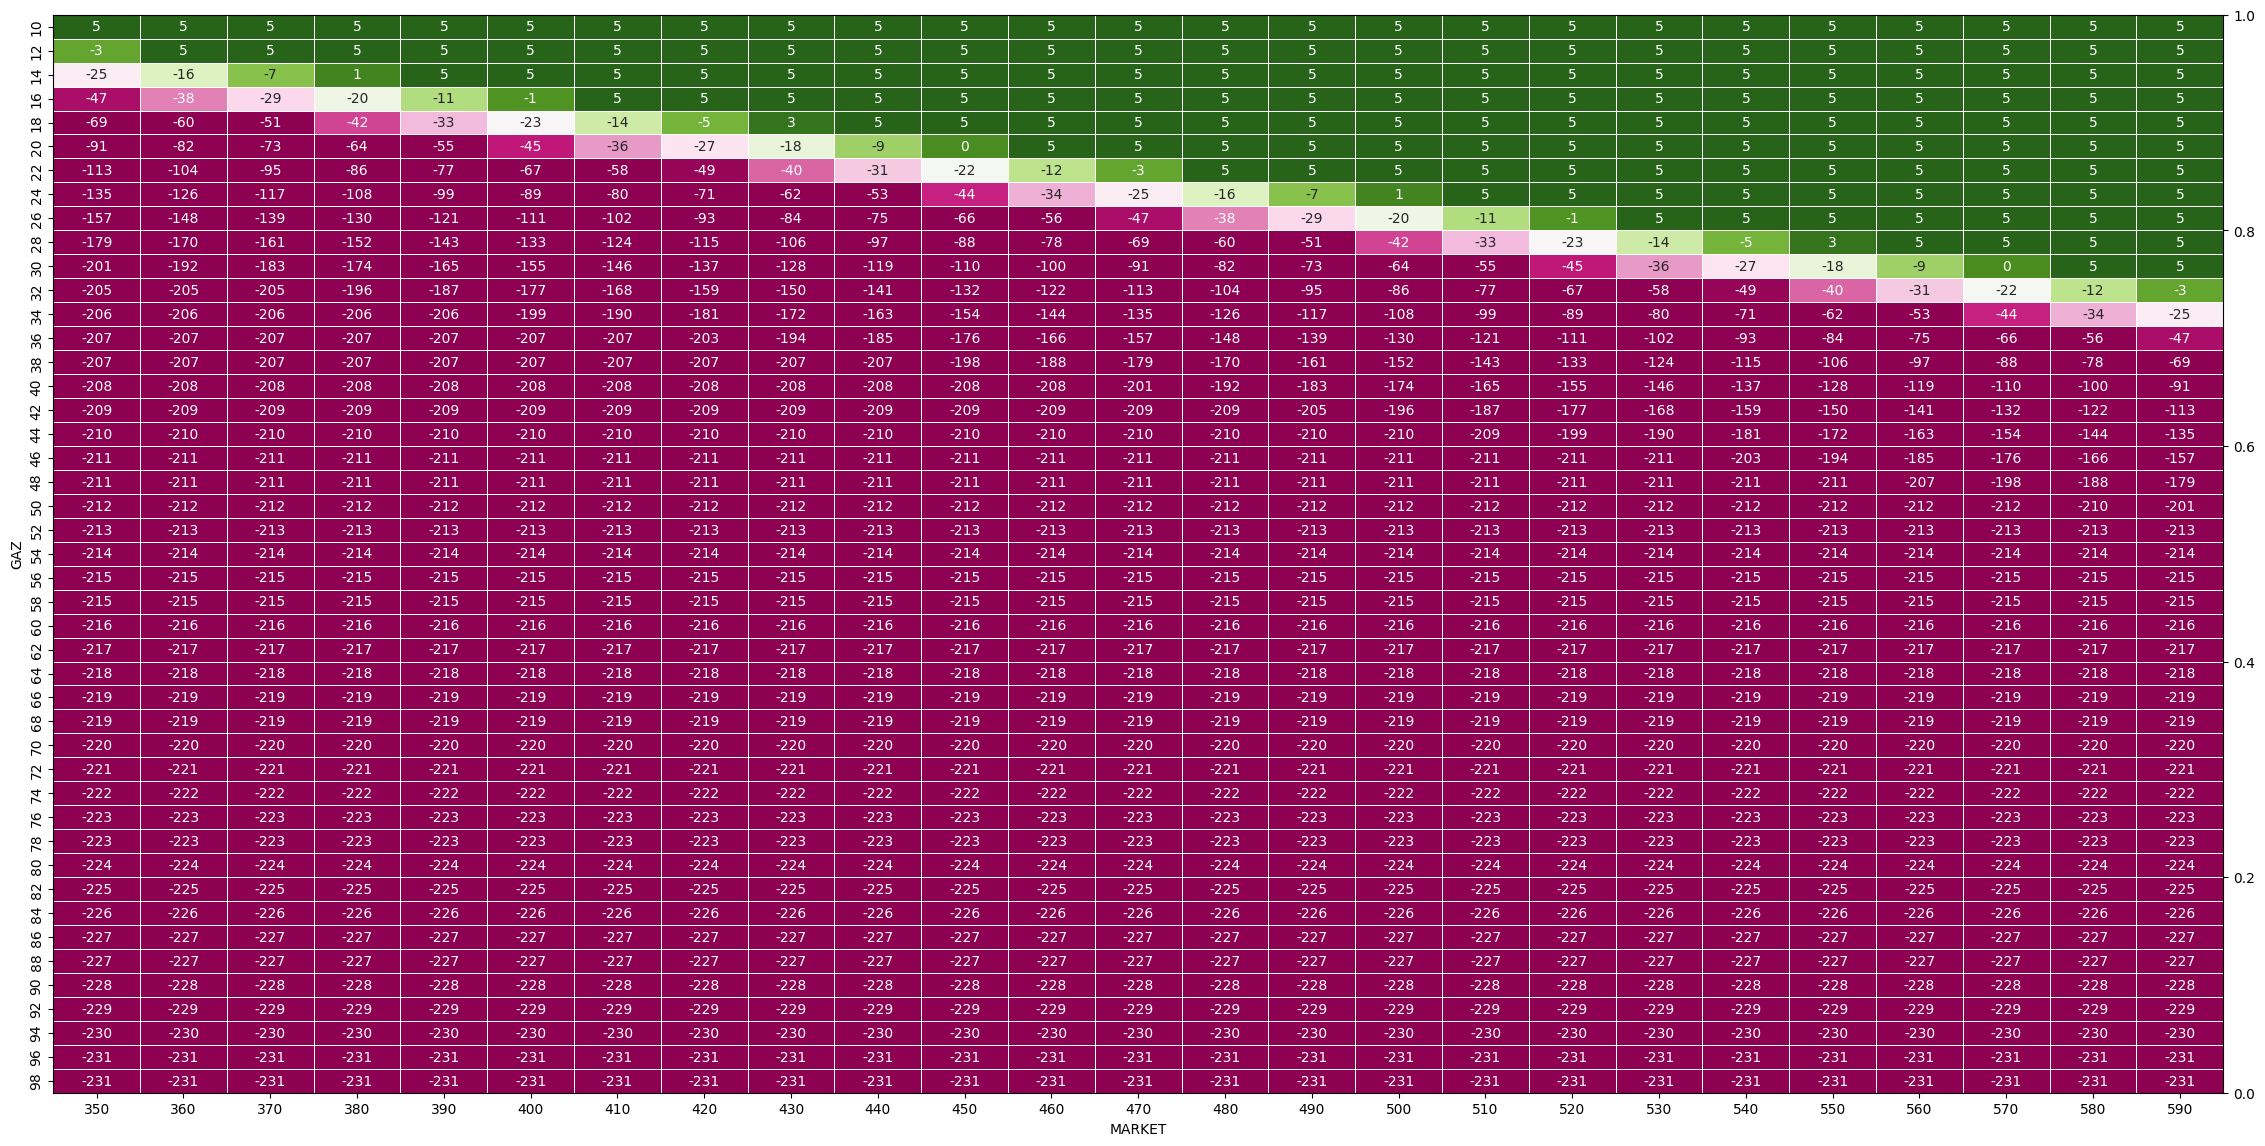

In [93]:
fig,ax = plt.subplots(figsize=(28,14))
# sns.set_palette("Paired")
plt.tick_params(bottom='on')
g = sns.heatmap(df.values,annot=True,xticklabels=market_list, yticklabels=gaz_list, linewidth=.5 ,cmap='PiYG', vmin=-50, vmax=5,cbar=False, fmt='d');
# im = ax.imshow(df ,cmap='PiYG', vmin=-15, vmax=15, aspect='auto');
g.set_xlabel('MARKET');
g.set_ylabel('GAZ');
ax2 = plt.twinx()
#x_ = (eqcp_list-eqcp_mini)/5
# y_ = (x_.max()-x_)*0.7
#sns.lineplot(x=x_, y=y_, linewidth=5, ax=ax2);
# ax.plot(eqcp_list*0.7, linewidth=50);
# ax2.axis('tight')


In [88]:
545*0.65

354.25

In [7]:
geyser = sns.load_dataset("geyser")
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


<Figure size 2800x1500 with 0 Axes>

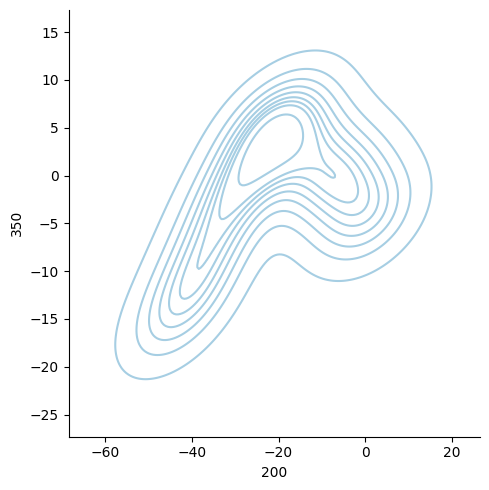

In [8]:
fig = plt.figure(figsize=(28,15))
sns.set_palette("Paired")
graphe2 = sns.displot(data=df, x=df[200], y=df[350], kind='kde');
